In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [445]:
spotify_df_org = pd.read_csv('data/raw/Spotify-dataset.csv', index_col='index')
spotify_df_org.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
index,,,,,,,,,,,,,,,,,,,,
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


+ Basic Track Info:
  - track_id: Unique identifier for each song
  - artists: Who performed the song
  - album_name: The album the song is from
  - track_name: The song title
  - track_genre: Music category (rock, pop, jazz, etc.)

+ Popularity & Usage:

  - popularity: How popular the song is (0-100 scale)
  - duration_ms: How long the song is in milliseconds
  - explicit: Whether the song has explicit/inappropriate language

+ Musical Characteristics:
These are Spotify's audio analysis features that describe how a song "feels":

  - danceability: How suitable the song is for dancing (0.0-1.0)
  - energy: How intense and active the song feels
  - loudness: The overall volume level of the track
  - valence: Musical positivity - high valence = happy/uplifting, low valence = sad/dark
  - tempo: Speed of the song (beats per minute)

+ Technical Audio Features:

  - key: The musical key the song is in (like C major, F# minor)
  - mode: Whether it's in a major (typically happier) or minor (often sadder) key
  - speechiness: How much the track sounds like spoken word rather than music
  - acousticness: How acoustic (non-electronic) vs electronic the song is
  - instrumentalness: How much of the track is instrumental vs has vocals
  - liveness: Whether it sounds like a live performance vs studio recording
  - time_signature: The rhythmic pattern (like 4/4 time, 3/4 waltz time)

## Cleaning dataset

In [446]:
display(spotify_df_org.info())
display(spotify_df_org.isnull().sum())
display(spotify_df_org[spotify_df_org.duplicated()].shape)

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

None

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

(450, 20)

In [448]:
df_cleaned = spotify_df_org.dropna()
df_cleaned = df_cleaned.sort_values(by='popularity', ascending=False)
#df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.drop_duplicates(subset=['track_id','artists', 'track_name'])
print(df_cleaned.shape)
#display(df_cleaned[df_cleaned.duplicated(subset='track_id')])

(89740, 20)


## Exploring relations between target & features

### Numerical Exploration

In [449]:
# show top and least popular track_genre
track_genre_popularity = df_cleaned.groupby(['track_genre'])['popularity'].mean().reset_index(name='popularity_avg')
display(track_genre_popularity.sort_values(ascending=False, by='popularity_avg').head(10))
display(track_genre_popularity.sort_values(ascending=True, by='popularity_avg').head(10))

,track_genre,popularity_avg
65,k-pop,59.193925
71,metal,58.368293
81,pop-film,58.244172
15,chill,55.678100
94,sad,51.505222
102,songwriter,50.760000
33,emo,50.405874
44,grunge,49.965018
30,edm,49.545994
55,indian,48.973538


,track_genre,popularity_avg
59,iranian,2.224696
93,romance,3.549779
24,detroit-techno,11.169928
13,chicago-house,12.235415
67,latin,13.104575
90,rock,14.400273
42,grindcore,14.574747
66,kids,14.880582
64,jazz,15.042032
16,classical,15.281831


<Axes: xlabel='popularity_avg', ylabel='track_genre'>

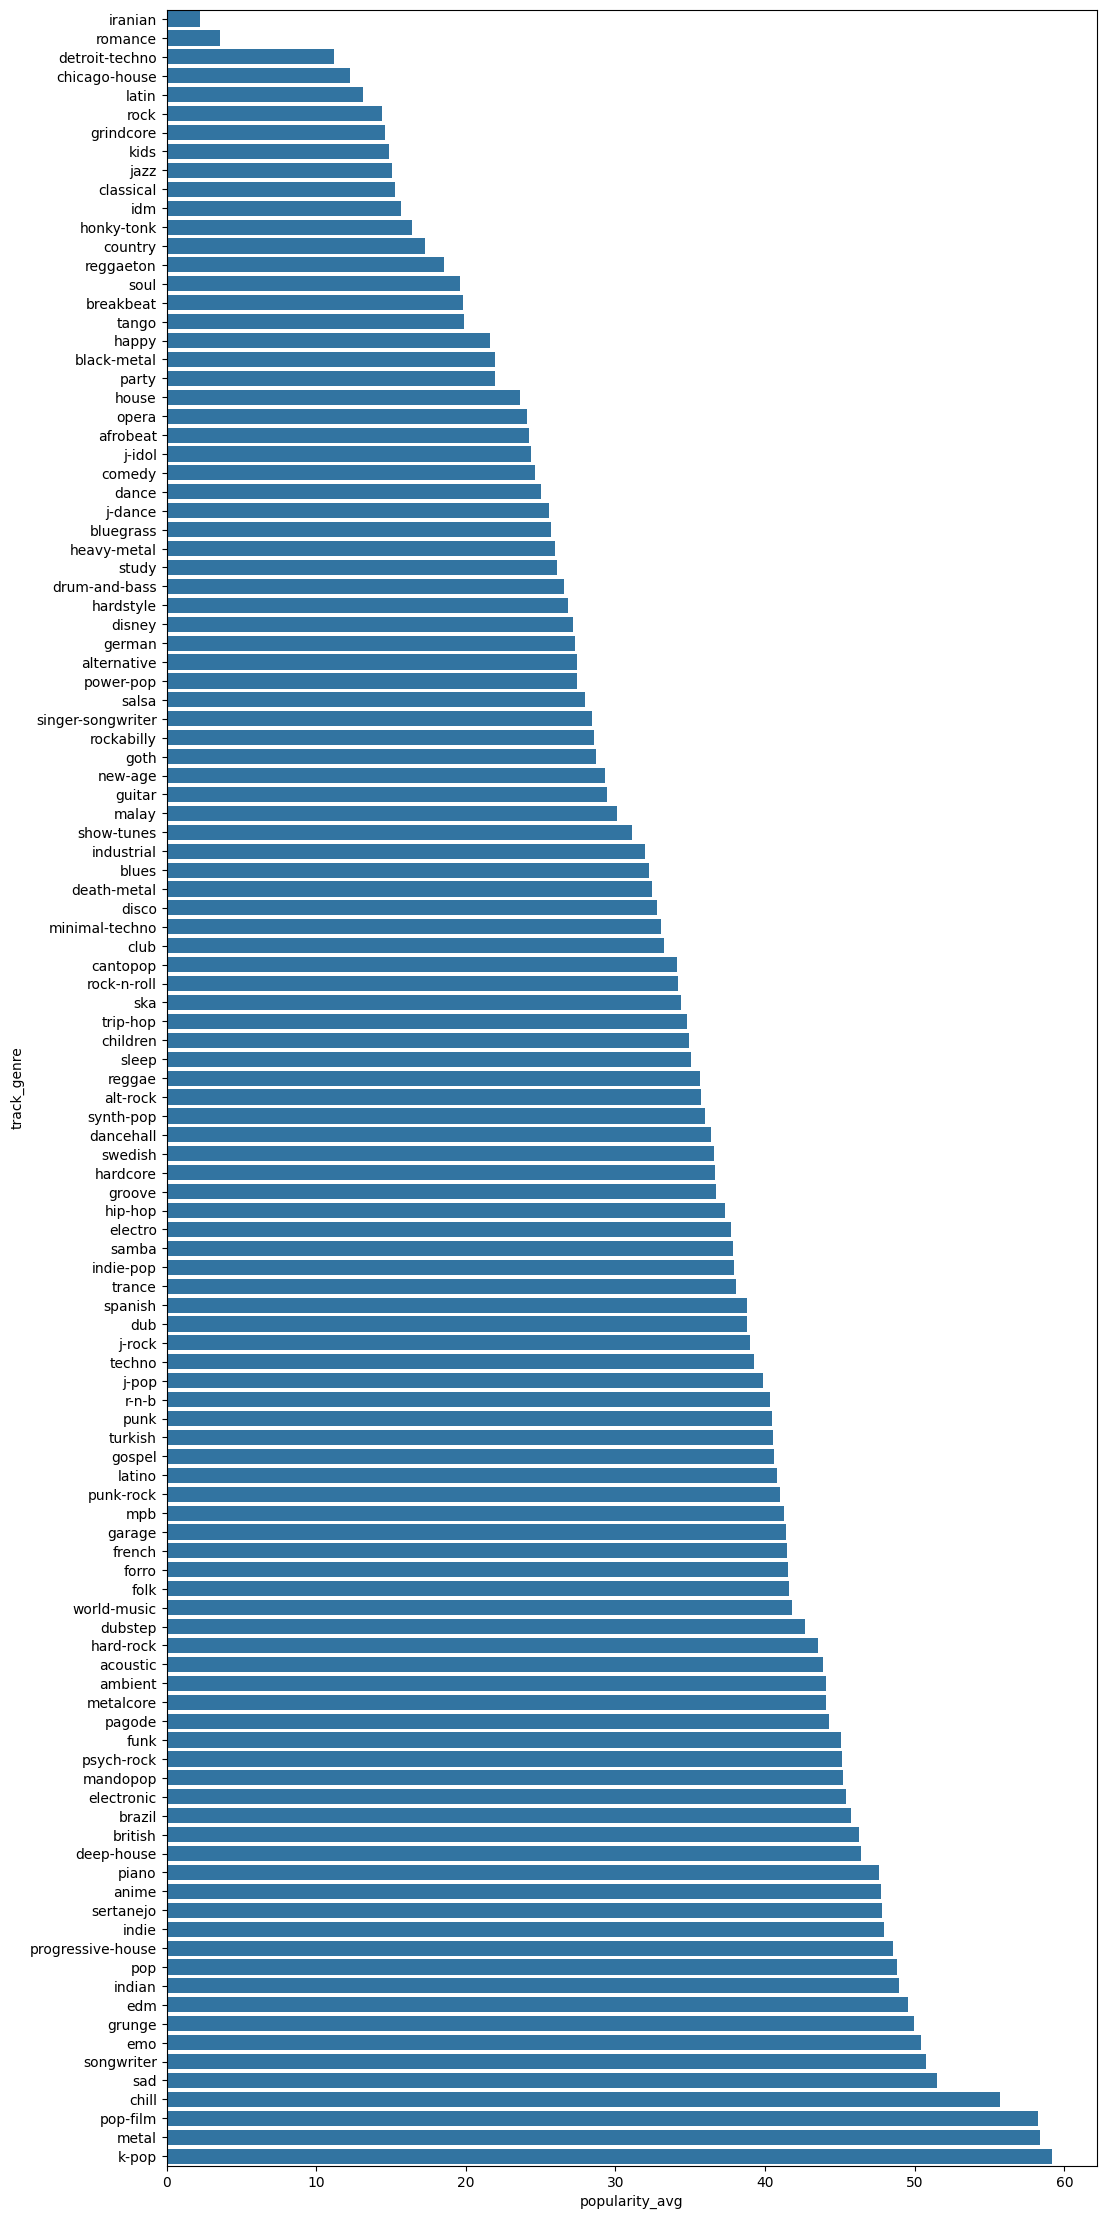

In [450]:
plt.figure(figsize=(12,28))
sns.barplot(data=track_genre_popularity.sort_values(by='popularity_avg'),
            y='track_genre',
            x='popularity_avg',
            )

In [451]:
df_cleaned.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [452]:
num_cols = df_cleaned.select_dtypes(include='number').columns

<Axes: >

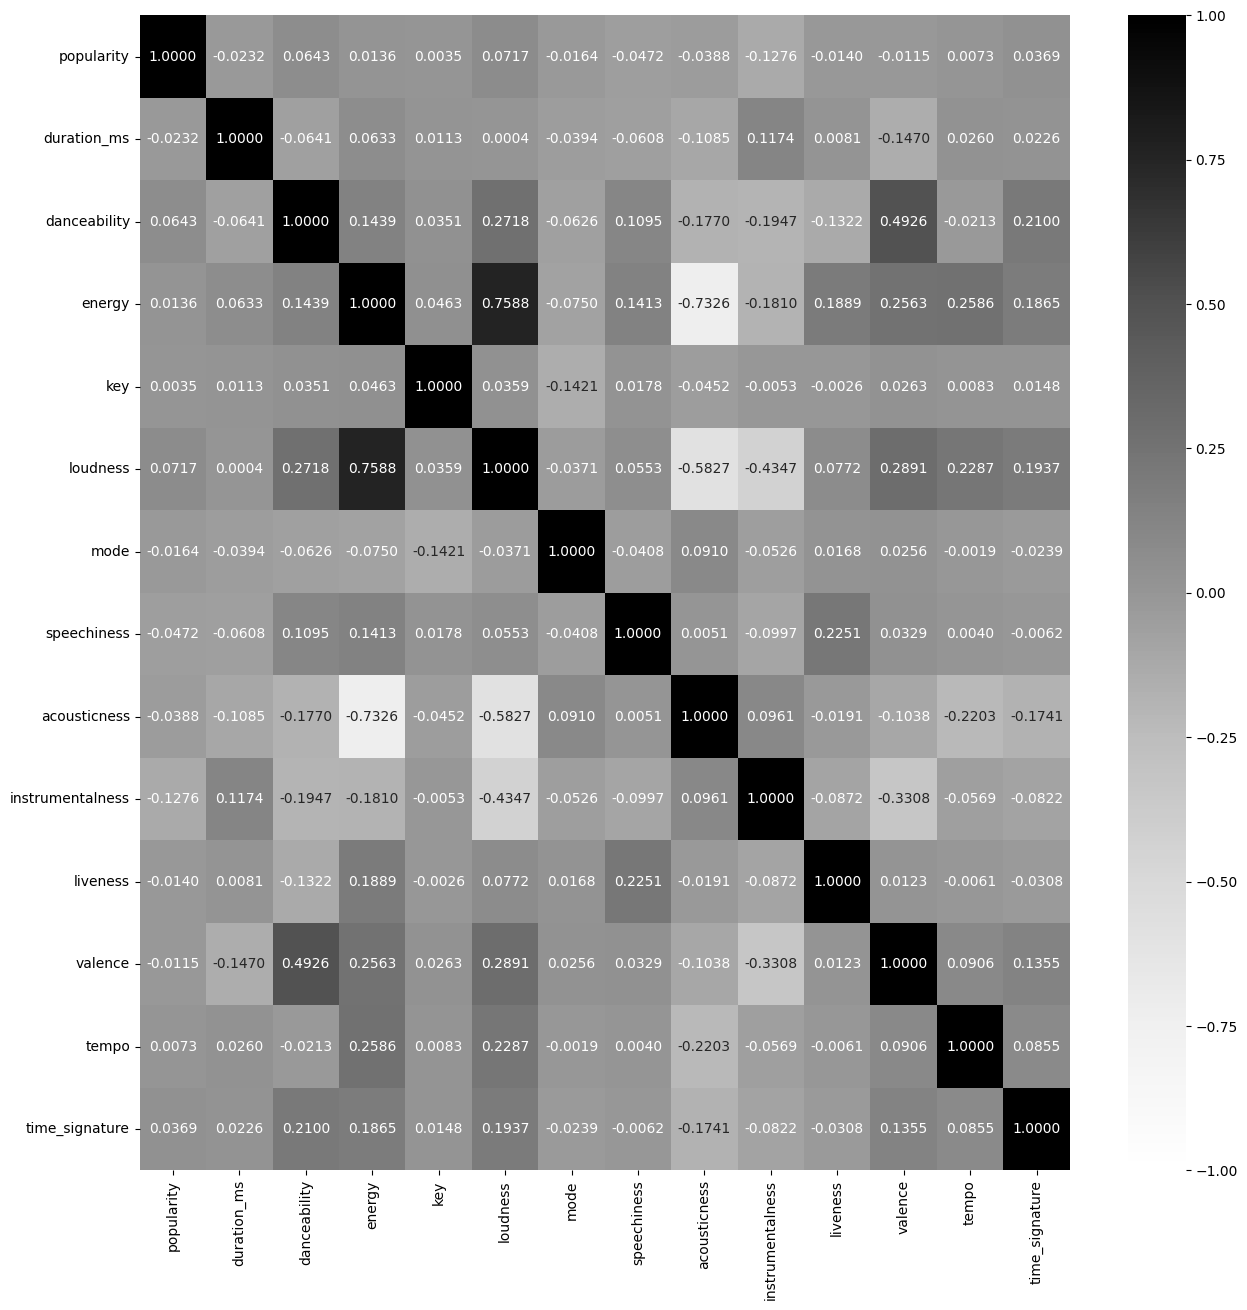

In [453]:
plt.figure(figsize=(15,15))
sns.heatmap(df_cleaned[num_cols].corr(), 
            annot=True, 
            fmt='.4f',
            vmin=-1.0,
            vmax=1.0,
            cmap=plt.cm.Grays)

In [454]:
df_cleaned.groupby('explicit')['popularity'].mean().reset_index(name='popularity_mean')

,explicit,popularity_mean
0,False,32.861963
1,True,36.887721


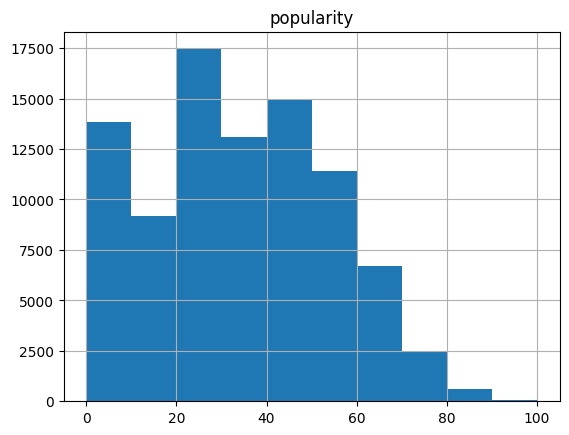

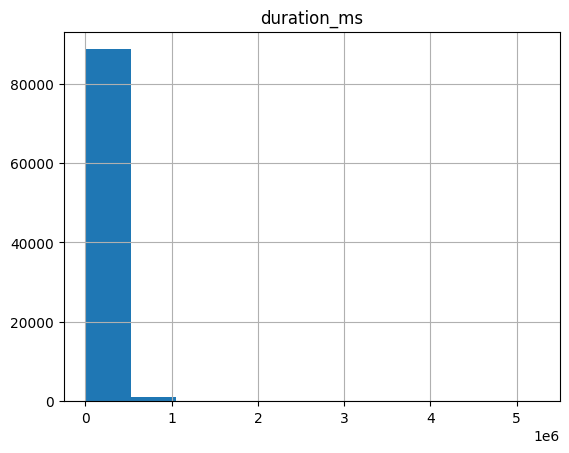

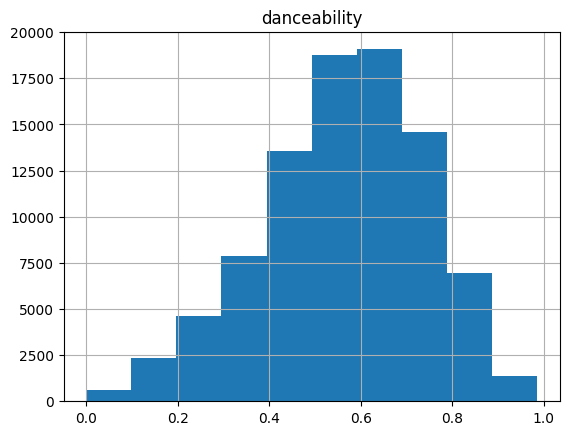

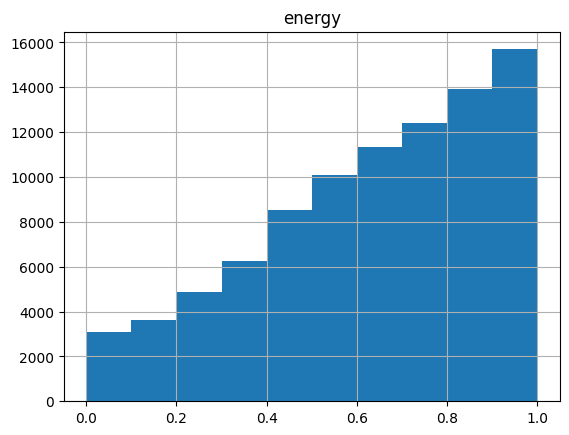

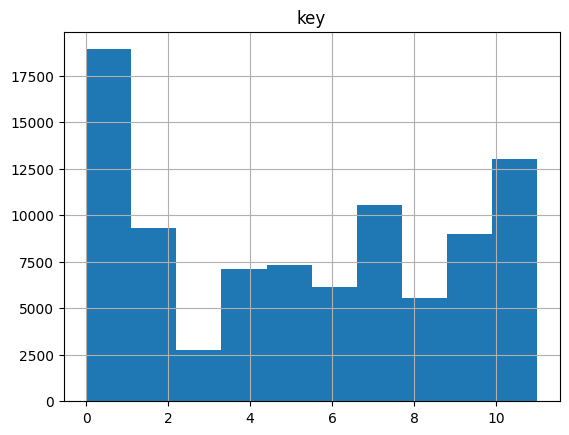

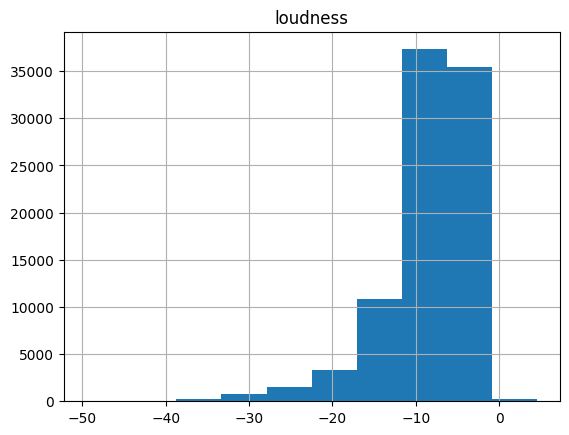

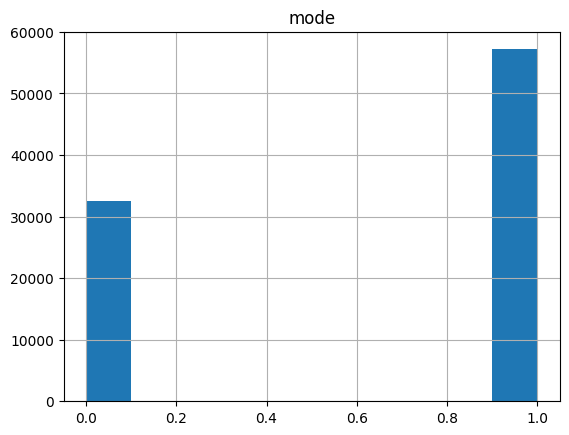

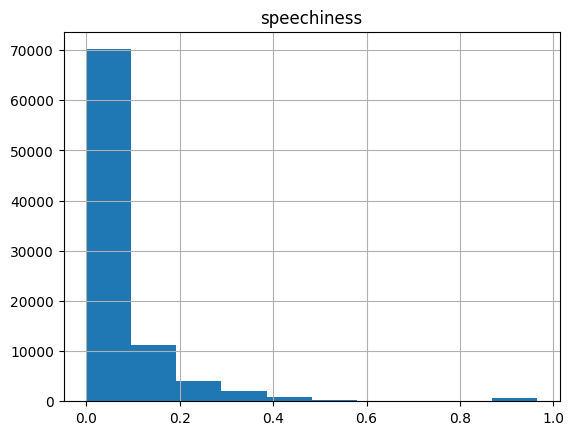

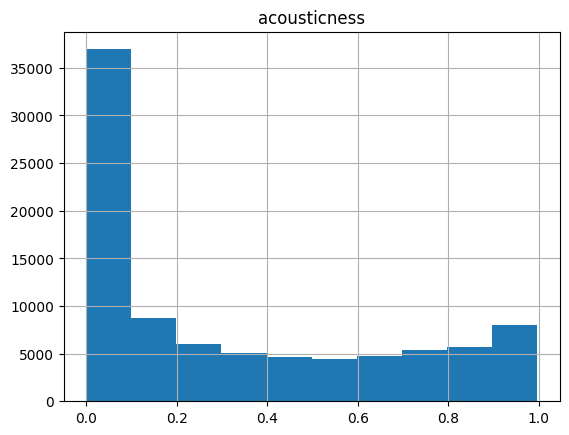

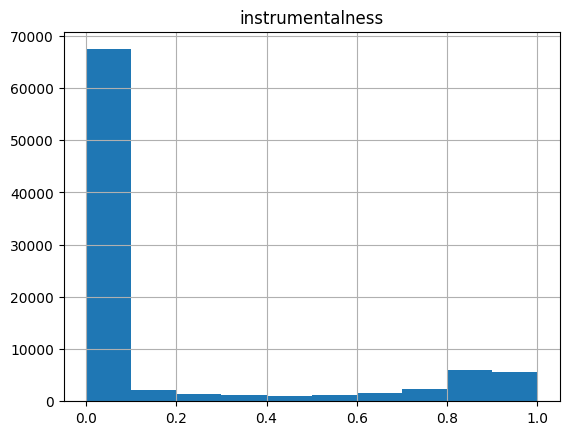

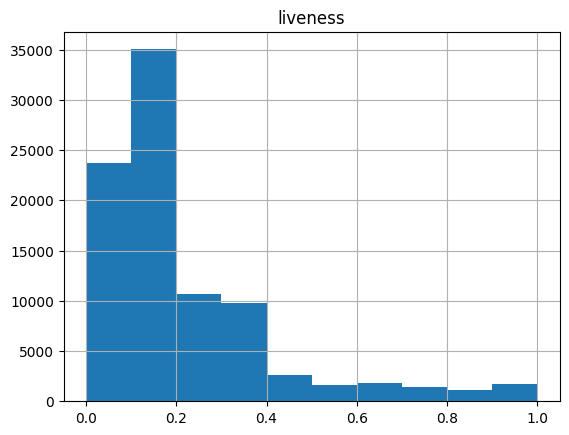

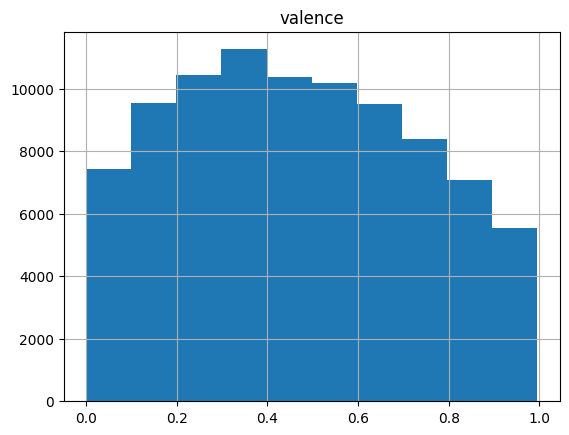

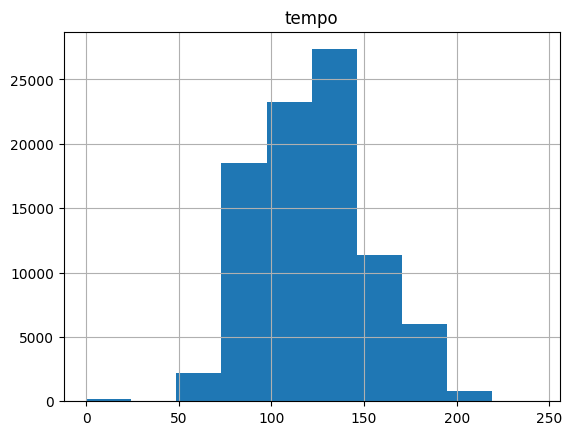

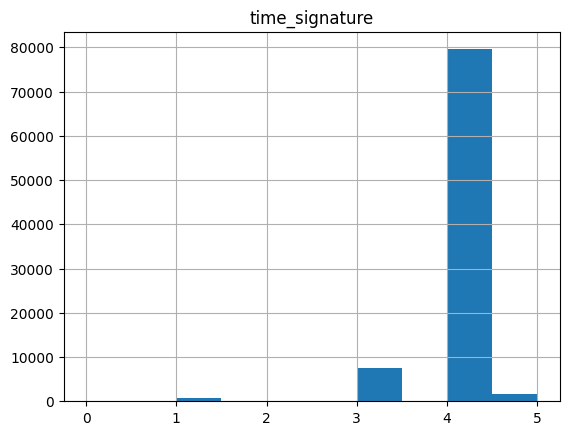

In [455]:
#fig, ax = plt.subplot(2,7)
for col in df_cleaned.select_dtypes(include='number').columns:
    i=0
    plt.figure(i)
    df_cleaned[col].hist() 
    i += 1
    plt.title(col)
    plt.show()


Text(0.5, 0, 'Loudness (dB)')

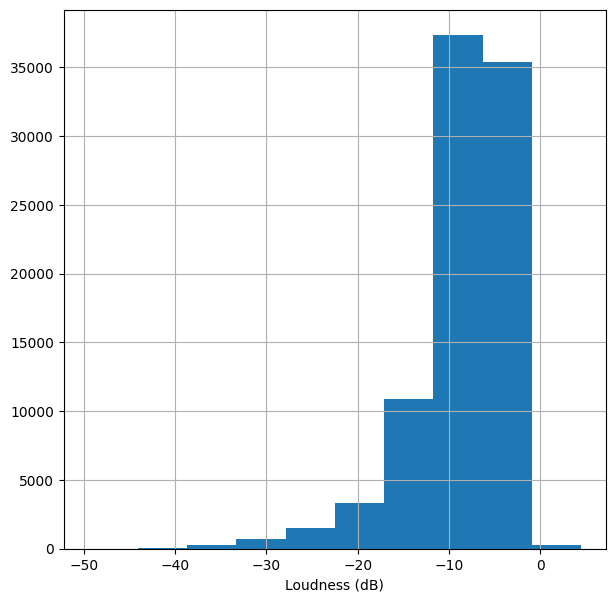

In [456]:
plt.figure(figsize=(7,7))
df_cleaned.loudness.hist()
plt.xlabel('Loudness (dB)')

In [457]:
bins  = [-50, -30, -20, -10, 0, np.inf]
labels = ['-50 : -30', '-30 : -20', '-20 : -10', '-10 : 0', ' > 0']

df_cleaned['loudness_categ'] = pd.cut(df_cleaned['loudness'],bins=bins, labels=labels)
display(df_cleaned[['loudness', 'loudness_categ']].sort_values(ascending=False, by='loudness'))
display(df_cleaned['loudness_categ'].value_counts(normalize=True))

,loudness,loudness_categ
index,,
17574,4.532,> 0
59225,3.156,> 0
38840,2.574,> 0
59337,1.864,> 0
37738,1.821,> 0
...,...,...
79719,-43.957,-50 : -30
101360,-46.251,-50 : -30
101722,-46.591,-50 : -30


loudness_categ
-10 : 0      0.730912
-20 : -10    0.226632
-30 : -20    0.034243
-50 : -30    0.007455
 > 0         0.000758
Name: proportion, dtype: float64

loudness             7
energy               9
valence              9
danceability        10
acousticness        10
tempo               10
instrumentalness    11
speechiness         12
liveness            12
time_signature      12
duration_ms         13
popularity          13
mode                13
key                 13
dtype: int64


<Axes: >

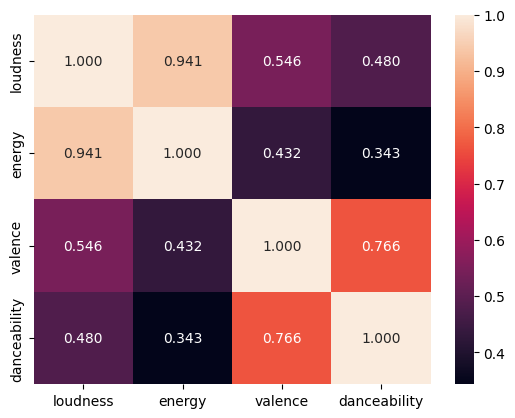

In [458]:
# calculate correlation between numerical features
corr_matrix = df_cleaned.select_dtypes(include='number').corr() 
potential_corr = corr_matrix[np.logical_or(corr_matrix > 0.2, corr_matrix < -0.2)]
# most non nulls columns will be assumed to categorize the data
print(potential_corr.isna().sum().sort_values(ascending=True)) 
sns.heatmap(corr_matrix[['loudness', 'energy', 'valence','danceability']].corr(),
                        annot=True,
                        fmt='0.3f')

<Figure size 640x480 with 0 Axes>

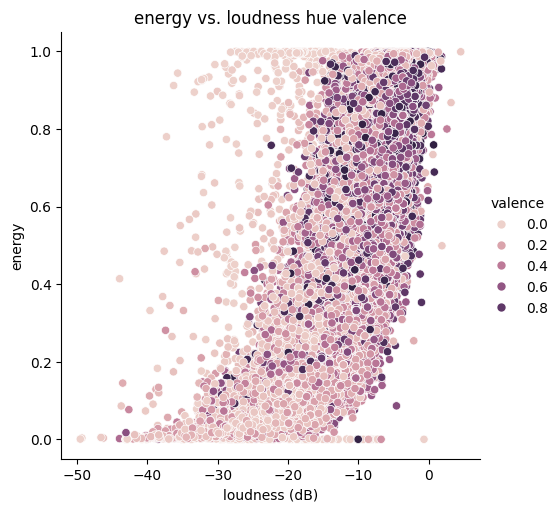

<Figure size 640x480 with 0 Axes>

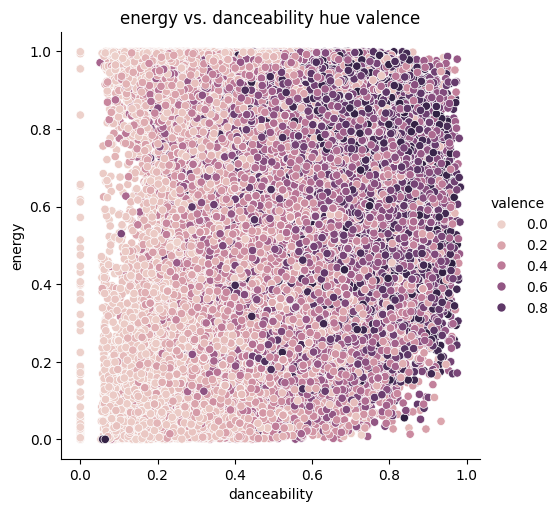

<Figure size 640x480 with 0 Axes>

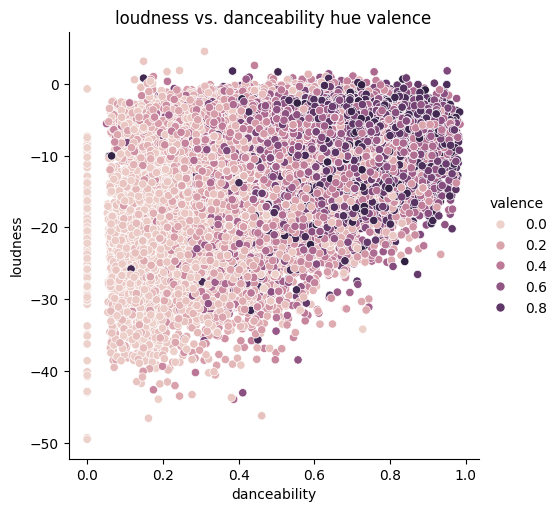

In [459]:
plt.figure(0)
sns.relplot(x='loudness',
            y='energy',
            hue='valence',
            data=df_cleaned)

plt.xlabel('loudness (dB)')
plt.ylabel('energy')
plt.title('energy vs. loudness hue valence')
plt.show()

plt.figure(1)
sns.relplot(x='danceability',
            y='energy',
            hue='valence',
            data=df_cleaned)

plt.xlabel('danceability')
plt.ylabel('energy')
plt.title('energy vs. danceability hue valence')
plt.show()

plt.figure(2)
sns.relplot(x='danceability',
            y='loudness',
            hue='valence',
            data=df_cleaned)

plt.xlabel('danceability')
plt.ylabel('loudness')
plt.title('loudness vs. danceability hue valence')
plt.show()

In [460]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df_cleaned[['valence', 'danceability', 'energy']]

scaler =  StandardScaler()
x_scaled = scaler.fit_transform(X)

KMeans = KMeans(n_clusters=4, random_state=42)
df_cleaned['mood_cluster'] = KMeans.fit_predict(x_scaled)

pd.DataFrame(
    scaler.inverse_transform(KMeans.cluster_centers_),
    columns=['valence', 'danceability', 'energy']    
)

#df_cleaned['mood_cluster'] = df_cleaned['mood_cluster'].map({0: 'chill',1: 'sad',2: 'party',3: 'happy'})

,valence,danceability,energy
0,0.208787,0.350543,0.257230
1,0.756920,0.674343,0.748385
2,0.404009,0.660425,0.490522
3,0.320053,0.447730,0.854187


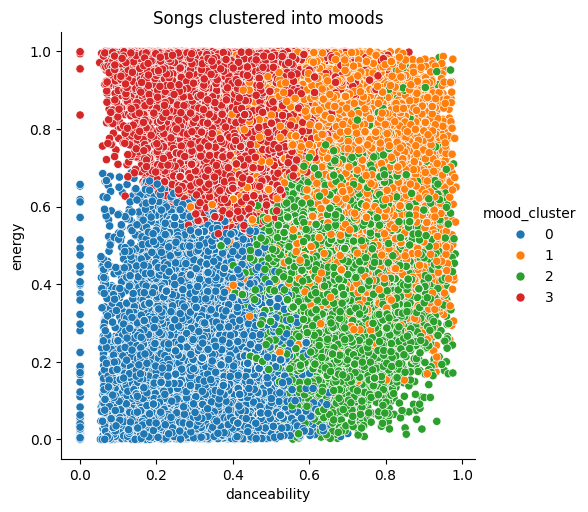

In [461]:
sns.relplot(
    df_cleaned,
    x=df_cleaned['danceability'],
    y= df_cleaned['energy'],
    hue=df_cleaned['mood_cluster'],  
    palette='tab10',
)
plt.title("Songs clustered into moods")
plt.show()

In [462]:
df_cleaned['mood'] = df_cleaned['mood_cluster'].map({0: 'chill',1: 'party',2: 'sad',3: 'happy'})
display(df_cleaned)
display(df_cleaned['mood'].value_counts(normalize=True))

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,loudness_categ,mood_cluster,mood
index,,,,,,,,,,,,,,,,,,,,,
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.4720,2,...,0.01300,0.000005,0.266,0.238,131.121,4,dance,-10 : 0,2,sad
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.7820,2,...,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop,-10 : 0,1,party
88410,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.6790,7,...,0.58300,0.000002,0.218,0.850,124.980,4,reggae,-10 : 0,1,party
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.9650,7,...,0.00383,0.000007,0.371,0.304,128.040,4,edm,-10 : 0,3,happy
68304,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.7150,5,...,0.09930,0.000291,0.126,0.187,106.672,4,latino,-10 : 0,2,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64891,0TtaAamcGe5CJbMazy2nxv,Mel Tormé,All I Want For Christmas Is You,The Christmas Song - Live At The Crescendo Clu...,0,185266,False,0.413,0.0417,1,...,0.94800,0.000000,0.120,0.225,100.098,1,jazz,-20 : -10,0,chill
64890,7KvE6pHVijDMMWjJ0DypKJ,Mel Tormé,Christmas Best Hits 2022,The Christmas Song - Live At The Crescendo Clu...,0,185266,False,0.413,0.0417,1,...,0.94800,0.000000,0.120,0.225,100.098,1,jazz,-20 : -10,0,chill
64888,1to8N5c31zyFz0c3AahJs7,Mel Tormé,Thanksgiving Party,Comin' Home Baby,0,163106,False,0.632,0.4290,7,...,0.45700,0.000000,0.228,0.789,143.174,4,jazz,-20 : -10,1,party


mood
party    0.332951
happy    0.259438
sad      0.253822
chill    0.153789
Name: proportion, dtype: float64

,instrumentalness,loudness
count,89740.000000,89740.000000
mean,0.173415,-8.498994
std,0.323849,5.221518
min,0.000000,-49.531000
25%,0.000000,-10.322250
50%,0.000058,-7.185000
75%,0.097625,-5.108000
max,1.000000,4.532000


<Axes: >

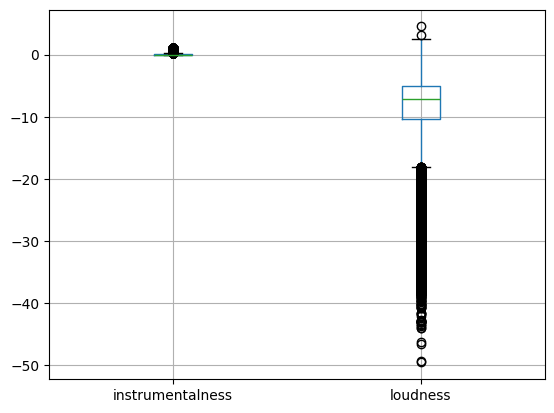

In [463]:
display(df_cleaned[['instrumentalness', 'loudness']].describe())
df_cleaned[['instrumentalness', 'loudness']].boxplot()

In [464]:
display(df_cleaned.groupby('track_genre')['instrumentalness'].median().sort_values(ascending=False).head(14))
display(df_cleaned.groupby('track_genre')['loudness'].mean().sort_values(ascending=False).head(14))

track_genre
sleep             0.8830
ambient           0.8810
new-age           0.8780
piano             0.8770
study             0.8670
detroit-techno    0.8570
minimal-techno    0.8510
classical         0.8480
idm               0.8450
iranian           0.7920
techno            0.7620
guitar            0.7555
grindcore         0.6685
chicago-house     0.5450
Name: instrumentalness, dtype: float64

track_genre
j-idol              -3.742611
drum-and-bass       -4.164945
hardstyle           -4.340521
party               -4.494756
metalcore           -4.521764
dubstep             -4.983947
reggaeton           -5.057245
forro               -5.133732
latin               -5.235085
edm                 -5.281148
dance               -5.285149
house               -5.299229
progressive-house   -5.308004
death-metal         -5.367066
Name: loudness, dtype: float64

### Categorical Exploration

In [465]:
display(df_cleaned.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10))
display(df_cleaned.groupby('artists')['popularity'].mean().sort_values(ascending=False).tail(10))
display(df_cleaned.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10))
display(df_cleaned.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).tail(10))

artists
Sam Smith;Kim Petras          100.0
Bizarrap;Quevedo               99.0
Manuel Turizo                  98.0
Bad Bunny;Chencho Corleone     97.0
Bad Bunny;Bomba Estéreo        95.0
Joji                           94.0
Beyoncé                        93.0
Harry Styles                   92.0
Rema;Selena Gomez              92.0
Luar La L                      91.0
Name: popularity, dtype: float64

artists
Antonín Dvořák;Katia Labèque;Marielle Labèque               0.0
Antonín Dvořák;Randall Goosby;Zhu Wang                      0.0
Antonín Dvořák;Wiener Philharmoniker;Herbert von Karajan    0.0
Antonio José;Alejandro Fernández                            0.0
Antonio José;Cali Y El Dandee                               0.0
Antônio Carlos Jobim;Frank Sinatra                          0.0
Antônio Carlos Jobim;Herbie Mann;João Gilberto              0.0
The Ready Set                                               0.0
Flux Pavilion;Rosie Oddie                                   0.0
Björn Holmgren                                              0.0
Name: popularity, dtype: float64

track_genre
k-pop         59.193925
metal         58.368293
pop-film      58.244172
chill         55.678100
sad           51.505222
songwriter    50.760000
emo           50.405874
grunge        49.965018
edm           49.545994
indian        48.973538
Name: popularity, dtype: float64

track_genre
classical         15.281831
jazz              15.042032
kids              14.880582
grindcore         14.574747
rock              14.400273
latin             13.104575
chicago-house     12.235415
detroit-techno    11.169928
romance            3.549779
iranian            2.224696
Name: popularity, dtype: float64

In [466]:
df_cleaned.groupby('track_genre').apply(
    lambda x: x.groupby('album_name')['popularity'].mean().nlargest(1),
    include_groups= False
).reset_index(name='popularity_mean').head(10)

,track_genre,album_name,popularity_mean
0,acoustic,Pano,75.0
1,afrobeat,Calle 13 (Explicit Version),75.0
2,alt-rock,Elephant,84.0
3,alternative,Miss You,87.0
4,ambient,Fracture,69.0
5,anime,Habit,75.0
6,black-metal,"Now, Diabolical",52.0
7,bluegrass,Edges Run,64.0
8,blues,Second Helping (Expanded Edition),81.0
9,brazil,Move Your Body,82.0


In [467]:
df_cleaned.groupby(['track_genre', 'album_name'])['popularity'].mean().\
    reset_index(name='popularity').sort_values(by='popularity',ascending=False).head(10)

,track_genre,album_name,popularity
9763,dance,Unholy (feat. Kim Petras),100.0
25440,hip-hop,"Quevedo: Bzrp Music Sessions, Vol. 52",99.0
42178,reggae,La Bachata,98.0
37806,piano,I Ain’t Worried (Music From The Motion Picture...,96.0
38396,pop,Indigo (Extended),96.0
38230,pop,As It Was,95.0
32054,latin,Un Verano Sin Ti,94.5
38350,pop,Glimpse of Us,94.0
9703,dance,RENAISSANCE,93.0
42215,reggae,PROVENZA,93.0


In [468]:
pd.crosstab(df_cleaned['track_genre'], df_cleaned['explicit'], normalize='index').head(10)

explicit,False,True
track_genre,,
acoustic,0.943080,0.056920
afrobeat,0.981481,0.018519
alt-rock,0.953629,0.046371
alternative,0.755924,0.244076
ambient,0.996499,0.003501
anime,0.941469,0.058531
black-metal,0.873662,0.126338
bluegrass,0.994934,0.005066
blues,0.983232,0.016768


In [469]:
artist_genre_counts =  df_cleaned.groupby('artists')['track_genre'].nunique().reset_index(name='genre_count')
multi_genre_artists = artist_genre_counts[artist_genre_counts['genre_count'] > 1]
multi_genre_artists

,artists,genre_count
25,10cc,2
28,12 Stones,2
41,175R,2
44,19,2
56,2 minutos,2
...,...,...
31117,Árbol,2
31133,Ñejo & Dalmata,2
31161,İlhan İrem,3
31246,≠ME,2


In [470]:
locate_largest = multi_genre_artists['genre_count'].nlargest(3)
locate_largest

8607     6
21810    6
29758    6
Name: genre_count, dtype: int64

In [471]:
multi_genre_artists.loc[locate_largest.index]

,artists,genre_count
8607,Ellie Goulding,6
21810,Prateek Kuhad,6
29758,Wisin & Yandel,6


In [472]:
df_cleaned[df_cleaned['artists'].str.contains('Billie Eilish')]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,loudness_categ,mood_cluster,mood
index,,,,,,,,,,,,,,,,,,,,,
81053,0u2P5u6lvoDfwTYjAADbn4,Billie Eilish;Khalid,lovely (with Khalid),lovely (with Khalid),89,200185,False,0.351,0.296,4,...,0.9340,0.000000,0.0950,0.1200,115.284,4,pop,-20 : -10,0,chill
81951,4RVwu0g32PAqgUiJoXsdF8,Billie Eilish,Happier Than Ever,Happier Than Ever,88,298899,True,0.332,0.225,0,...,0.7670,0.003490,0.1280,0.2970,81.055,3,pop,-10 : 0,0,chill
31050,3ZCTVFBt2Brf31RLEnCkWJ,Billie Eilish,everything i wanted,everything i wanted,86,245425,False,0.704,0.225,6,...,0.9020,0.657000,0.1060,0.2430,120.006,4,electro,-20 : -10,2,sad
31057,04sN26COy28wTXYj3dMoiZ,Billie Eilish,Bored,Bored,85,180933,False,0.614,0.318,7,...,0.8960,0.002390,0.0795,0.1120,119.959,4,electro,-20 : -10,2,sad
31018,2Fxmhks0bxGSBdJ92vM42m,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,84,194087,False,0.701,0.425,7,...,0.3280,0.130000,0.1000,0.5620,135.128,4,electro,-20 : -10,2,sad
31064,32BeYxKPrig1LefHsC0Xuo,Billie Eilish,Happier Than Ever (Edit),Happier Than Ever - Edit,82,151444,True,0.334,0.599,0,...,0.0468,0.000392,0.2050,0.1270,161.740,3,electro,-10 : 0,0,chill
31251,41zXlQxzTi6cGAjpOXyLYH,Billie Eilish,dont smile at me,idontwannabeyouanymore,81,203569,False,0.483,0.412,7,...,0.7370,0.000000,0.1160,0.2470,170.163,3,electro,-10 : 0,0,chill
31156,7hDVYcQq6MxkdJGweuCtl9,Billie Eilish,dont smile at me,ocean eyes,80,200379,False,0.511,0.363,4,...,0.8160,0.031700,0.0840,0.1690,144.892,4,electro,-10 : 0,0,chill
31154,51NFxnQvaosfDDutk0tams,Billie Eilish,Bellyache,bellyache,79,179172,False,0.695,0.573,4,...,0.4600,0.073400,0.4820,0.4080,99.939,4,electro,-10 : 0,2,sad


### Exploring duration & time

In [473]:
df_cleaned['duration_min'] = df_cleaned['duration_ms']/60000
df_cleaned[['duration_min', 'duration_ms']]

,duration_min,duration_ms
index,,
20001,2.615717,156943
51664,3.315617,198937
88410,2.710617,162637
30003,2.920633,175238
68304,4.061933,243716
...,...,...
64891,3.087767,185266
64890,3.087767,185266
64888,2.718433,163106


In [474]:
display(df_cleaned.groupby('track_genre')['duration_min'].mean().sort_values(ascending=False).tail(10))
display(df_cleaned.groupby('track_genre')['duration_min'].mean().sort_values(ascending=False).head(10))

track_genre
rock-n-roll    2.950420
rockabilly     2.848329
chill          2.831399
honky-tonk     2.703895
kids           2.604921
sad            2.572809
disney         2.566434
study          2.358954
children       2.317416
grindcore      2.216751
Name: duration_min, dtype: float64

track_genre
detroit-techno    6.205873
minimal-techno    6.174377
chicago-house     6.118417
techno            5.340322
iranian           5.326178
breakbeat         5.299570
black-metal       5.230536
gospel            5.125457
new-age           5.071665
world-music       4.938388
Name: duration_min, dtype: float64

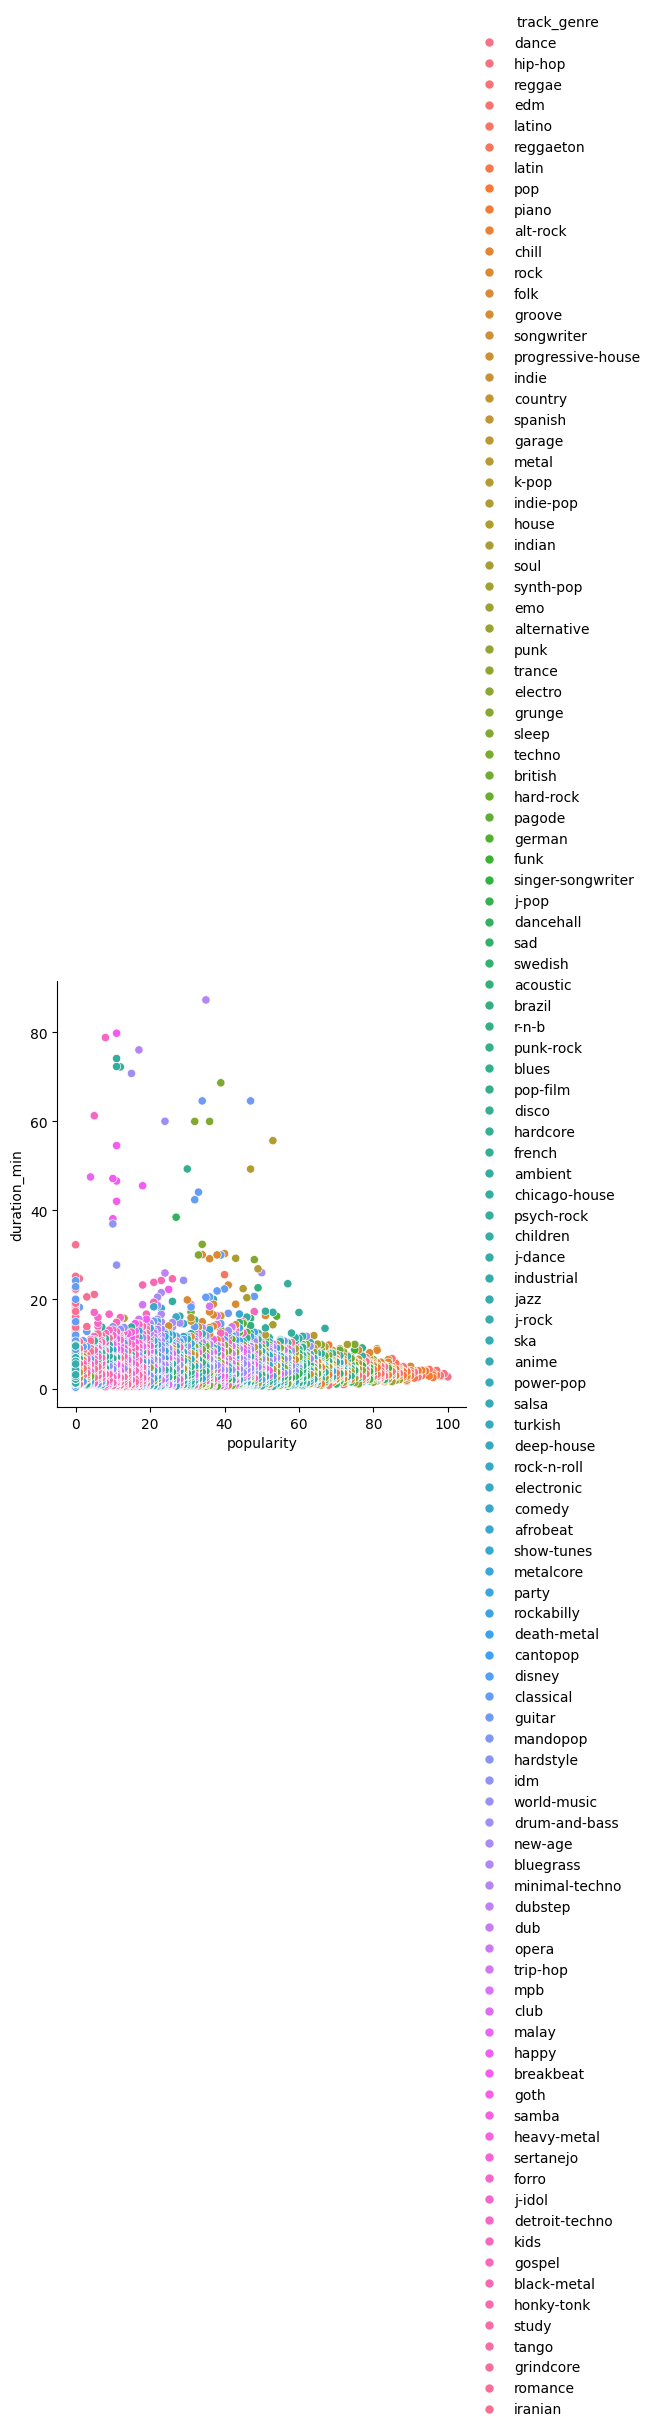

In [475]:
sns.relplot(data=df_cleaned,
            y='duration_min',
            x='popularity',
            hue='track_genre')

In [476]:
df_cleaned.groupby('track_genre')['time_signature'].value_counts().nlargest(10)

track_genre     time_signature
salsa           4                 978
chicago-house   4                 966
j-idol          4                 960
breakbeat       4                 956
hardstyle       4                 933
study           4                 932
detroit-techno  4                 927
heavy-metal     4                 927
drum-and-bass   4                 925
forro           4                 921
Name: count, dtype: int64

### Musical Key & Note

In [477]:
df_cleaned.groupby('track_genre').apply(
    lambda x: x.groupby('key')['popularity'].mean().nlargest(1),
    include_groups=False
).reset_index()

,track_genre,key,popularity
0,acoustic,3,46.666667
1,afrobeat,3,29.350000
2,alt-rock,10,53.333333
3,alternative,5,39.421053
4,ambient,3,49.045455
...,...,...,...
109,techno,3,44.000000
110,trance,3,47.344828
111,trip-hop,8,39.343284
112,turkish,5,42.803922


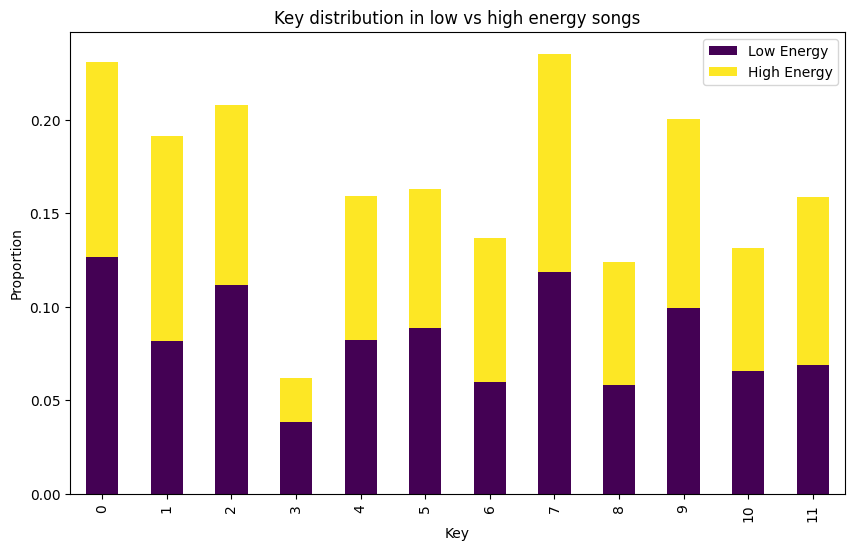

In [478]:
energy_threshold = df_cleaned['energy'].median()
df_cleaned['is_high_energy'] = (df_cleaned['energy'] > energy_threshold).astype(int)

key_energy_ct = pd.crosstab(df_cleaned['key'], df_cleaned['is_high_energy'], normalize='columns')

key_energy_ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Key distribution in low vs high energy songs')
plt.xlabel('Key')
plt.ylabel('Proportion')
plt.legend(['Low Energy', 'High Energy'])
plt.show()

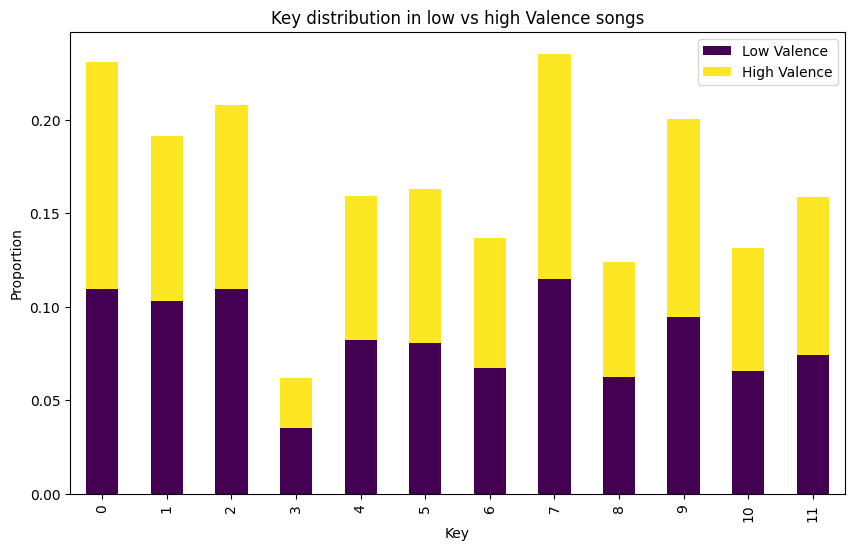

In [479]:
valence_threshold = df_cleaned['valence'].median()
df_cleaned['is_high_valence'] = (df_cleaned['valence'] > valence_threshold).astype(int)

key_energy_ct = pd.crosstab(df_cleaned['key'], df_cleaned['is_high_valence'], normalize='columns')

key_energy_ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Key distribution in low vs high Valence songs')
plt.xlabel('Key')
plt.ylabel('Proportion')
plt.legend(['Low Valence', 'High Valence'])
plt.show()

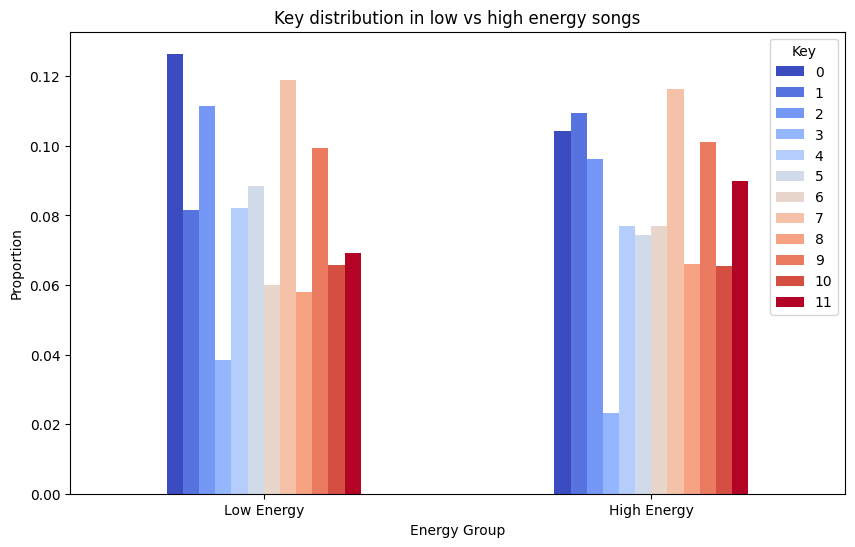

In [480]:
energy_threshold = df_cleaned['energy'].median()
df_cleaned['is_high_energy'] = (df_cleaned['energy'] > energy_threshold).astype(int)

# Crosstab
key_energy_ct = pd.crosstab(df_cleaned['key'], df_cleaned['is_high_energy'], normalize='columns')

# Plot
key_energy_ct.T.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title('Key distribution in low vs high energy songs')
plt.xlabel('Energy Group')
plt.ylabel('Proportion')
plt.xticks(ticks=[0,1], labels=['Low Energy', 'High Energy'], rotation=0)
plt.legend(title='Key')
plt.show()